In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('bollywood.csv')

print(df)

    No      RelDate                         MovieName  ReleaseTime  \
0    1  Apr-18-2014                          2 States            3   
1    2   Jan-4-2013                      Table No. 21            4   
2    3  Jul-18-2014                Amit Sahni Ki List            4   
3    4   Jan-4-2013                  Rajdhani Express            4   
4    5   Jul-4-2014                      Bobby Jasoos           44   
5    6  May-30-2014                        Citylights            2   
6    7  Sep-19-2014                     Daawat-E-Ishq            4   
7    8  Jan-11-2013        Matru Ki Bijlee Ka Mandola            4   
8    9  Jan-10-2014                      Dedh Ishqiya            3   
9   10  Jan-11-2013                         Gangoobai            4   
10  11  Mar-28-2014                       Dishkiyaoon            4   
11  12  Jan-18-2013                            Inkaar            4   
12  13  Jan-27-2014                        Ek Villain            2   
13  14  Jan-18-2013 

In [37]:
len(df)

51

In [38]:
df1 = df.groupby(['Genre']).count().sort_values('No',ascending = False)['No']
df1

Genre
ComedyGenre     12
 DramaGenre     11
ActionGenre      9
RomanceGenre     9
Thriller         5
Thriller         3
 Drama           1
Action           1
Name: No, dtype: int64

In [39]:
df1.head(1)

Genre
ComedyGenre    12
Name: No, dtype: int64

In [65]:
df['RelDate'] = pd.to_datetime(df['RelDate'],format='%b-%d-%Y')

# Extract the month and create a new column 'month'
df['Month'] = df['RelDate'].dt.month

monthly_counts = df['Month'].value_counts()

max_month = monthly_counts.idxmax()

print(f"The month with the maximum number of movie releases is: {max_month}")


The month with the maximum number of movie releases is: 1


In [69]:
df['RelDate'] = pd.to_datetime(df['RelDate'],format='%b-%d-%Y')

# Extract the month and create a new column 'month'
df['Month'] = df['RelDate'].dt.month

df['Budget'] = df['Budget'].replace('Cr', '', regex=True).astype(float)

# Filter movies with budget 25 crores or more
high_budget_movies = df[df['Budget'] >= 25]

# Count the number of high-budget movie releases for each month
monthly_counts = high_budget_movies['Month'].value_counts()

#Identify the month with the maximum number of high-budget movie releases
max_month = monthly_counts.idxmax()

print(f"The month with the most releases of high-budget movies is: {max_month}")

The month with the most releases of high-budget movies is: 1


In [71]:
df['Budget'] = df['Budget'].replace('Cr', '', regex=True).astype(float)
df['BoxOfficeCollection'] = df['BoxOfficeCollection'].replace('Cr', '', regex=True).astype(float)
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget'])/df['Budget']
(df.sort_values('ROI', ascending = False)).head(10)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,Month,ROI
3,4,2013-01-04,Rajdhani Express,4,DramaGenre,7.0,383.0,42626,86.0,19.0,105,1,53.714286
37,38,2014-07-11,Humpty Sharma Ki Dulhania,4,RomanceGenre,20.0,130.0,6604595,14535.0,2208.0,16743,7,5.500000
5,6,2014-05-30,Citylights,2,DramaGenre,7.0,35.0,1076591,1806.0,84.0,1890,5,4.000000
18,19,2014-09-12,Finding Fanny,4,ComedyGenre,15.0,58.9,6144142,13013.0,2746.0,15759,9,2.926667
43,44,2014-07-25,Kick,4,ActionGenre,100.0,377.0,18986221,101275.0,10066.0,111341,7,2.770000
27,28,2013-02-08,ABCD _ Any Body Can Dance,4,DramaGenre,12.0,44.0,4042091,10609.0,788.0,11397,2,2.666667
42,43,2014-09-19,Khoobsurat,4,RomanceGenre,12.0,39.4,5454349,12548.0,2038.0,14586,9,2.283333
47,48,2013-03-15,Jolly LLB,4,ComedyGenre,10.0,32.7,1741424,3024.0,181.0,3205,3,2.270000
32,33,2014-05-23,Heropanti,2,RomanceGenre,21.0,65.0,4005695,8189.0,1814.0,10003,5,2.095238
26,27,2014-10-24,Happy New Year,3,DramaGenre,125.0,383.0,6395202,37585.0,10269.0,47854,10,2.064000


In [74]:
df.groupby(['ReleaseTime']).mean()['ROI']

C:\Users\apurv\AppData\Local\Temp\ipykernel_8004\3551757473.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['ReleaseTime']).mean()['ROI']


ReleaseTime
1     1.141667
2     0.762938
3     1.380964
4     2.209254
44   -0.400000
Name: ROI, dtype: float64

In [80]:
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

print(correlation)
if correlation > 0:
    print("Correlation is positive")
else:
    print("Correlation is negative")

0.6734293516390922
Correlation is positive


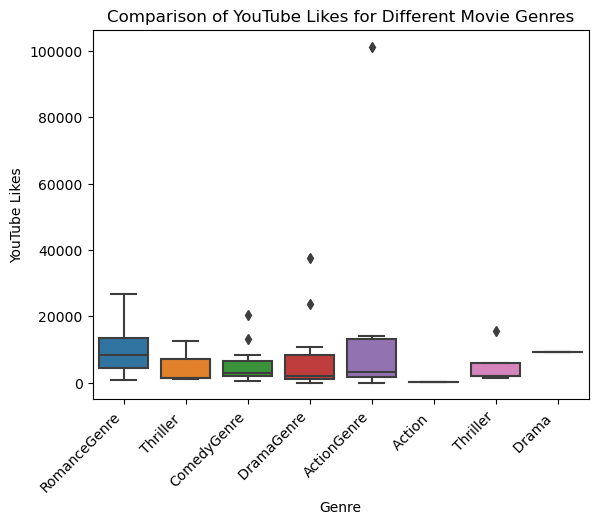

In [88]:
# Create boxplots to compare YouTube likes for each genre
sns.boxplot(x=df['Genre'], y=df['YoutubeLikes'])
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of YouTube Likes for Different Movie Genres')
plt.xlabel('Genre')
plt.ylabel('YouTube Likes')
plt.show()

#from boxplot it is clear that romance genre sees more youtube likes

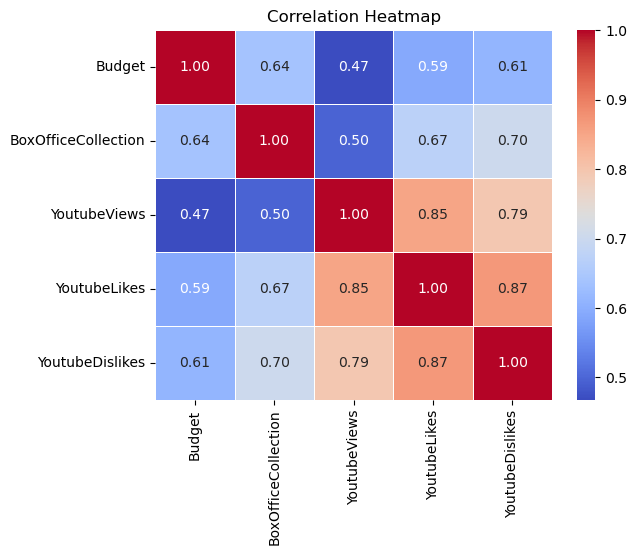

In [90]:
selected_columns = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
movies_subset = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = movies_subset.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#from the heatmap it is clear that YoutubeLikes and YoutubeDislikes, and YoutubeViews and YoutubeLikes are highly correlated 
#with correlation values 0.87 and 0.85 respectively